In [1]:
!pip install gym-anytrading gym

In [2]:
#!pip install tensorflow==2.13.0
!pip install tensorflow-addons


##!pip install gym==0.21


# Gym stuff
import gym
import gym_anytrading



import tensorflow as tf
import tensorflow_addons as tfa

# Processing libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

2023-07-24 21:50:54.473949: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Users/benadem/miniconda3/envs/myenv/lib/python3.10/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(
/Users/benadem/miniconda3/envs/myenv/lib/python3.10/site-packages/tensorflow_addons/utils/ensure_

In [ ]:
#!pip install stable-baselines3==1.1.0
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3 import A2C

In [3]:
!pip install seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("/Users/benadem/Downloads/BNB-EUR.csv")

In [ ]:
df.head()

In [4]:
df['Date'] = pd.to_datetime(df['Date'])
df.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [5]:
df.sort_values('Date', ascending=True, inplace=True)
df.head()
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-11-11,1.531579,1.644302,1.384112,1.432282,1.432282,7012047
1,2017-11-12,1.430927,1.434279,1.254017,1.303336,1.303336,13120669
2,2017-11-13,1.308756,1.489160,1.303108,1.446129,1.446129,10493698
3,2017-11-14,1.448410,1.487163,1.329718,1.350903,1.350903,6641445
4,2017-11-15,1.346823,1.378153,1.268018,1.298973,1.298973,6463673
...,...,...,...,...,...,...,...
2042,2023-06-15,226.041885,233.282547,216.054749,219.093597,219.093597,681176595
2043,2023-06-16,219.126266,221.541122,213.284836,215.865097,215.865097,459009608
2044,2023-06-17,215.858475,221.910339,212.424118,218.239960,218.239960,445929405
2045,2023-06-18,218.253067,227.381058,216.691315,223.256073,223.256073,412402765


In [6]:
df.set_index('Date', inplace=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-11-11,1.531579,1.644302,1.384112,1.432282,1.432282,7012047
2017-11-12,1.430927,1.434279,1.254017,1.303336,1.303336,13120669
2017-11-13,1.308756,1.489160,1.303108,1.446129,1.446129,10493698
2017-11-14,1.448410,1.487163,1.329718,1.350903,1.350903,6641445
2017-11-15,1.346823,1.378153,1.268018,1.298973,1.298973,6463673


In [10]:
import gym

env = gym.make('stocks-v0', df=df, frame_bound=(6,1000), window_size=6)
env.signal_features

/Users/benadem/miniconda3/envs/myenv/lib/python3.10/site-packages/gym/utils/passive_env_checker.py:31: UserWarning: WARN: A Box observation space has an unconventional shape (neither an image, nor a 1D vector). We recommend flattening the observation to have only a 1D vector or use a custom policy to properly process the data. Actual observation shape: (6, 2)
  logger.warn(


array([[ 1.432282,  0.      ],
       [ 1.303336, -0.128946],
       [ 1.446129,  0.142793],
       ...,
       [18.860605,  0.105024],
       [19.655931,  0.795326],
       [19.122122, -0.533809]])

In [11]:
env.action_space

Discrete(2)

/Users/benadem/miniconda3/envs/myenv/lib/python3.10/site-packages/gym/utils/passive_env_checker.py:174: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed a `seed` instead of using `Env.seed` for resetting the environment random number generator.
  logger.warn(
/Users/benadem/miniconda3/envs/myenv/lib/python3.10/site-packages/gym/utils/passive_env_checker.py:187: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed `options` to allow the environment initialisation to be passed additional information.
  logger.warn(
/Users/benadem/miniconda3/envs/myenv/lib/python3.10/site-packages/gym/utils/passive_env_checker.py:195: UserWarning: WARN: The result returned by `env.reset()` was not a tuple of the form `(obs, info)`, where `obs` is a observation and `info` is a dictionary containing additional information. Actual type: `<class 'numpy.ndarray'>`
  logger.warn(
/Users/benadem/miniconda3/envs/myenv/lib/python3.10/site-packages/gym

info {'total_reward': 16.461694, 'total_profit': 0.1759211911673377, 'position': 0}


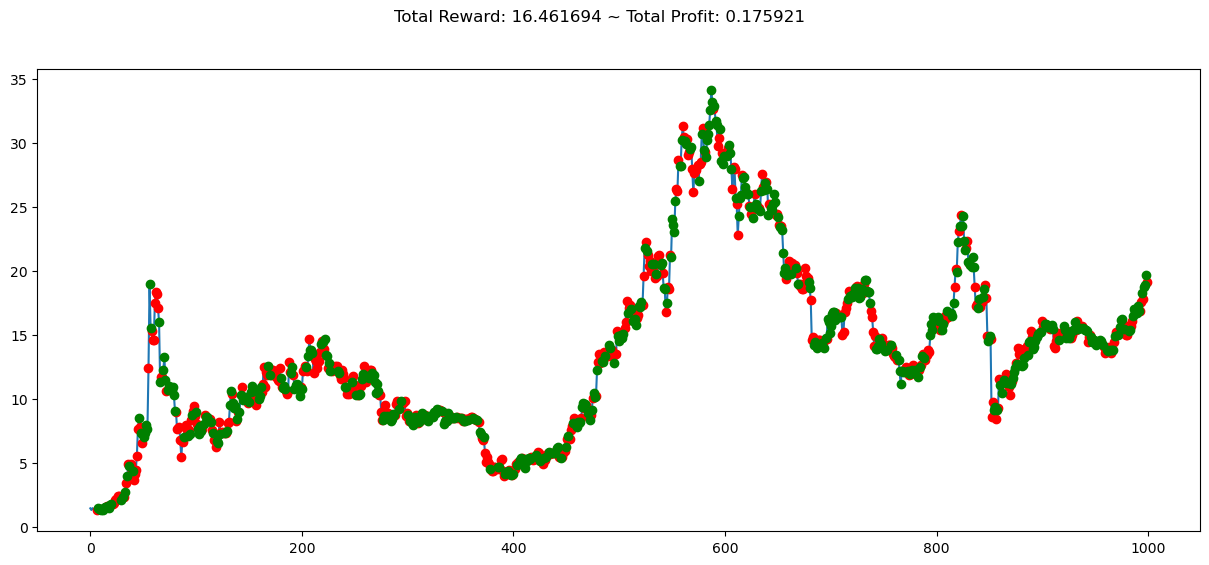

In [16]:
state = env.reset()
while True: 
    action = env.action_space.sample()
    n_state, reward, done, info = env.step(action)
    if done: 
        print("info", info)
        break
        
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()

In [12]:
!pip install finta


In [13]:
from gym_anytrading.envs import StocksEnv
from finta import TA

In [14]:
df['Volume'] = df['Volume'].astype(float)


In [15]:
df.dtypes


Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
dtype: object

In [16]:
df['SMA'] = TA.SMA(df, 12)
df['RSI'] = TA.RSI(df)
df['OBV'] = TA.OBV(df)
df.fillna(0, inplace=True)

In [17]:
df.head(15)


,Open,High,Low,Close,Adj Close,Volume,SMA,RSI,OBV
Date,,,,,,,,,
2017-11-11,1.531579,1.644302,1.384112,1.432282,1.432282,7012047.0,0.000000,0.000000,0.0
2017-11-12,1.430927,1.434279,1.254017,1.303336,1.303336,13120669.0,0.000000,0.000000,-13120669.0
2017-11-13,1.308756,1.489160,1.303108,1.446129,1.446129,10493698.0,0.000000,54.391413,-2626971.0
2017-11-14,1.448410,1.487163,1.329718,1.350903,1.350903,6641445.0,0.000000,39.112835,-9268416.0
2017-11-15,1.346823,1.378153,1.268018,1.298973,1.298973,6463673.0,0.000000,33.574167,-15732089.0
2017-11-16,1.320820,1.428394,1.303333,1.339718,1.339718,7580778.0,0.000000,40.672885,-8151311.0
2017-11-17,1.341527,1.342944,1.267956,1.280726,1.280726,7215162.0,0.000000,34.863647,-15366473.0
2017-11-18,1.281574,1.421843,1.270440,1.419766,1.419766,27276605.0,0.000000,52.194602,11910132.0
2017-11-19,1.418943,1.442576,1.330900,1.375177,1.375177,32451385.0,0.000000,47.802037,-20541253.0


In [18]:
def add_signals(env):
    start = env.frame_bound[0] - env.window_size
    end = env.frame_bound[1]
    prices = env.df.loc[:, 'Low'].to_numpy()[start:end]
    signal_features = env.df.loc[:, ['Low', 'Volume','SMA', 'RSI', 'OBV']].to_numpy()[start:end]
    return prices, signal_features

In [19]:
class MyCustomEnv(StocksEnv):
    _process_data = add_signals
    
env2 = MyCustomEnv(df=df, window_size=12, frame_bound=(12,50))

In [30]:
env2.signal_features


array([[ 1.38411200e+00,  7.01204700e+06,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00],
       [ 1.25401700e+00,  1.31206690e+07,  0.00000000e+00,
         0.00000000e+00, -1.31206690e+07],
       [ 1.30310800e+00,  1.04936980e+07,  0.00000000e+00,
         5.43914132e+01, -2.62697100e+06],
       [ 1.32971800e+00,  6.64144500e+06,  0.00000000e+00,
         3.91128349e+01, -9.26841600e+06],
       [ 1.26801800e+00,  6.46367300e+06,  0.00000000e+00,
         3.35741671e+01, -1.57320890e+07],
       [ 1.30333300e+00,  7.58077800e+06,  0.00000000e+00,
         4.06728852e+01, -8.15131100e+06],
       [ 1.26795600e+00,  7.21516200e+06,  0.00000000e+00,
         3.48636466e+01, -1.53664730e+07],
       [ 1.27044000e+00,  2.72766050e+07,  0.00000000e+00,
         5.21946017e+01,  1.19101320e+07],
       [ 1.33090000e+00,  3.24513850e+07,  0.00000000e+00,
         4.78020375e+01, -2.05412530e+07],
       [ 1.32471300e+00,  1.10723420e+07,  0.00000000e+00,
         4.87380169e+01

In [20]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,SMA,RSI,OBV
Date,,,,,,,,,
2017-11-11,1.531579,1.644302,1.384112,1.432282,1.432282,7012047.0,0.0,0.000000,0.0
2017-11-12,1.430927,1.434279,1.254017,1.303336,1.303336,13120669.0,0.0,0.000000,-13120669.0
2017-11-13,1.308756,1.489160,1.303108,1.446129,1.446129,10493698.0,0.0,54.391413,-2626971.0
2017-11-14,1.448410,1.487163,1.329718,1.350903,1.350903,6641445.0,0.0,39.112835,-9268416.0
2017-11-15,1.346823,1.378153,1.268018,1.298973,1.298973,6463673.0,0.0,33.574167,-15732089.0


In [21]:
env_maker = lambda: env2
env = DummyVecEnv([env_maker])

In [ ]:
model = A2C('MlpPolicy', env, verbose=1) 
model.learn(total_timesteps=1000000)

Using cpu device
------------------------------------
| time/                 |          |
|    fps                | 523      |
|    iterations         | 100      |
|    time_elapsed       | 0        |
|    total_timesteps    | 500      |
| train/                |          |
|    entropy_loss       | -0.671   |
|    explained_variance | -13.5    |
|    learning_rate      | 0.0007   |
|    n_updates          | 99       |
|    policy_loss        | 0.0891   |
|    value_loss         | 0.0954   |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 603      |
|    iterations         | 200      |
|    time_elapsed       | 1        |
|    total_timesteps    | 1000     |
| train/                |          |
|    entropy_loss       | -0.688   |
|    explained_variance | -258     |
|    learning_rate      | 0.0007   |
|    n_updates          | 199      |
|    policy_loss        | -0.194   |
|    value_loss      

In [ ]:
env = MyCustomEnv(df=df, window_size=12, frame_bound=(80,250))
obs = env.reset()
while True: 
    obs = obs[np.newaxis, ...]
    action, _states = model.predict(obs)
    obs, rewards, done, info = env.step(action)
    if done:
        print("info", info)
        break

In [ ]:
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()
run["Plot of Stock Predictions"].upload(
        neptune.types.File.as_image(plt.get_figure())
    )